In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Primeira parte

## Carregando os dados

In [24]:
# Extraindo os dados dos arquivos CSV
data_pathA = 'HW2_ex1_dataA.csv'
dfA = pd.read_csv(data_pathA)
data_pathB = 'HW2_ex1_dataB.csv'
dfB = pd.read_csv(data_pathB)

# Extraindo o número de linhas e colunas de cada conjunto de dados
lA, cA = dfA.shape
lB, cB = dfB.shape

In [25]:
# Inicializando arrays para armazenar os dados
timeA = np.zeros((lA, 1))
yA = np.zeros((lA, 1))

# Loop para preencher os arrays com os dados do conjunto A
for i in range(lA):
    timeA[i] = dfA.iloc[i, 0]
    yA[i] = dfA.iloc[i, 1]

# Mesma lógica para o conjunto B
timeB = np.zeros((lB, 1))
yB = np.zeros((lB, 1))

for i in range(lB):
    timeB[i] = dfB.iloc[i, 0]
    yB[i] = dfB.iloc[i, 1]

## Plotagem dos gráficos

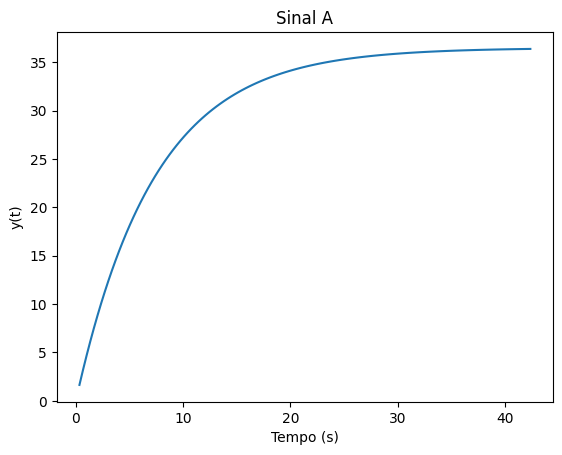

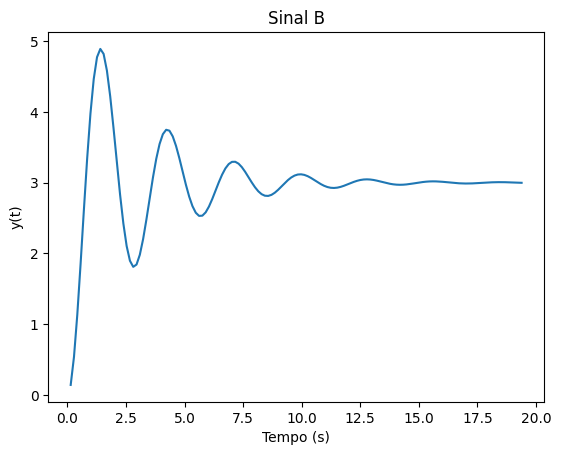

In [26]:
plt.plot(timeA, yA)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Sinal A')

plt.show()

plt.plot(timeB, yB)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Sinal B')    

plt.show()
  